# Grouping

We will use the Palmer penguins

In [2]:
import pandas as pd

# read in penguins dataset from URL
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv")

# print number of rows
print(len(penguins))

penguins.head()

344


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Summary statistics

In `pandas` it is easy to get summary statistics for each column in a dataframe

**Example**

In [3]:
# get the number of non-NA vlaues in each column 
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [6]:
# get the minimum value in each numeric column
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

##  Grouping

Our penguins data can be naturally split (islands, sex, species, year). 
Often we want to calculate summary statistics for these groups. 
How do we do this?

We use `groupby()`. General syntax:
```
df.groupby(columns_to_group_by)
```
where (most often) `columns_to_group_by` = a single column name (string) or a list of column names. The unique values of the column (or columns) will be used as the groups of the data frame. 

**Example**

Calculate mean flipper length by species.

First, find the method that calculates the mean: `mean()`

In [8]:
# this is the average of the whole flipper length column
penguins.flipper_length_mm.mean()

200.91520467836258

To get the mean flipper length:
1. group dataset by species, 
2. select column*
3. apply mean function

In [13]:

penguins.groupby('species').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252,2008.013158
Chinstrap,48.833824,18.420588,195.823529,3733.088235,2007.970588
Gentoo,47.504878,14.982114,217.186992,5076.016260,2008.080645


In [14]:
penguins.groupby('species').mean().flipper_length_mm

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

In [15]:
penguins.groupby('species').flipper_length_mm

In [16]:
penguins.groupby('species').flipper_length_mm.mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

In [19]:
penguins.groupby('species').mean('flipper_length_mm')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252,2008.013158
Chinstrap,48.833824,18.420588,195.823529,3733.088235,2007.970588
Gentoo,47.504878,14.982114,217.186992,5076.016260,2008.080645


We can also group by combinations of columns. 

Example

We want to know what was the number of penguins in every island on different years. 

`count()` is a method to count the non-NA values on each column

In [20]:
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

When we group by island and year, we get the count of non-NA values for each column by each combination of island and year:

In [22]:
penguins.groupby(['island','year']).count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

We want to plot the surveyed population per year and island.

We could use a "one liner" to do it this way:

<AxesSubplot:ylabel='island,year'>

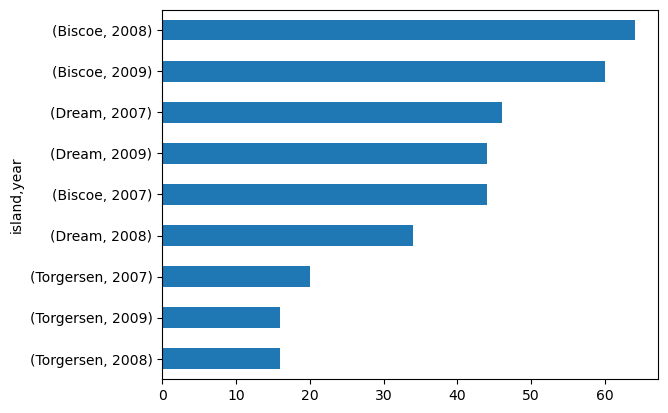

In [26]:
penguins.groupby(['island','year']).count().species.sort_values().plot(kind='barh')